# Лабораторная работа 4    
# Правильный многоугольник Рело. Векторизация вычислений в numpy

Трофимова Вероника Сергевна, 04.04.2025

## Задание 4.1. Построение треугольника Рело


### Этап 1. Вычисление координат вершин правильного треугольника

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
n=3
center=np.array([0,0])
r=10
N=100
l=r
R=l/(2*np.sin(np.pi/n))

In [29]:
t=np.arange(0,2*np.pi,2*np.pi/n)
vertices=center+R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [30]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

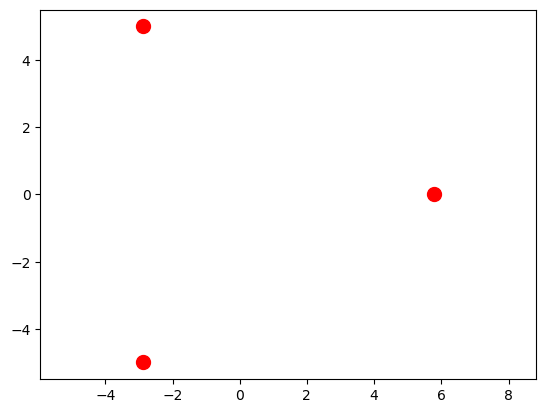

In [31]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

### Этап 2. Представление одной стороны треугольника Рело

In [32]:
alpha=2*np.pi/n
beta=alpha/2
angle=np.linspace(-beta/2, beta/2, N)
side0=vertices[0]+r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

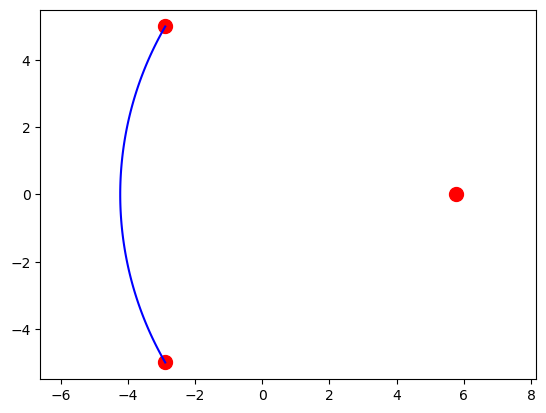

In [33]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [34]:
side1=vertices[1]+r*np.transpose([np.cos(angle + np.pi + alpha),np.sin(angle + np.pi + alpha)])

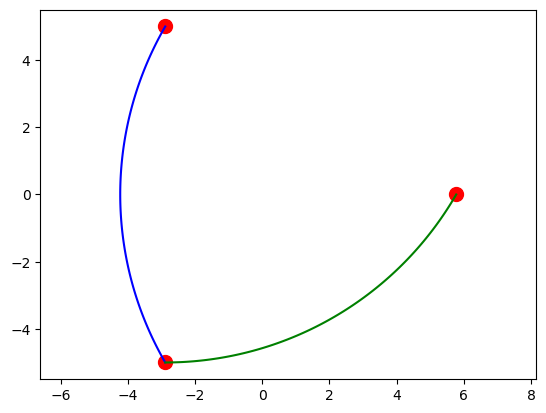

In [35]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

### Этап 3. Моделирование границы треугольника Рело

In [36]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]
sides = np.concatenate(list_sides)

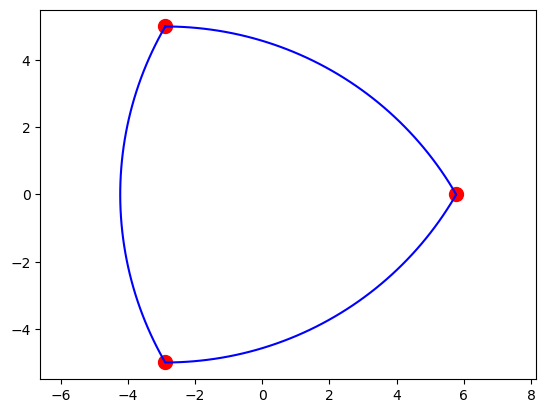

In [37]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.2. Построение правильного многоугольника Рело

In [38]:
n=7
center=np.array([0,0])
r=10
N=100
l=2*r*np.sin(np.pi/(2*n))
R=l/(2*np.sin(np.pi/n))

In [39]:
alpha=2*np.pi/n 
beta=alpha/2
angle=np.linspace(-beta/2, beta/2, N)

t=np.arange(0,2*np.pi,2*np.pi/n)
vertices=center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.12858432,  0.        ],
       [ 3.19762002,  4.00968868],
       [-1.14121737,  5.        ],
       [-4.62069481,  2.22520934],
       [-4.62069481, -2.22520934],
       [-1.14121737, -5.        ],
       [ 3.19762002, -4.00968868]])

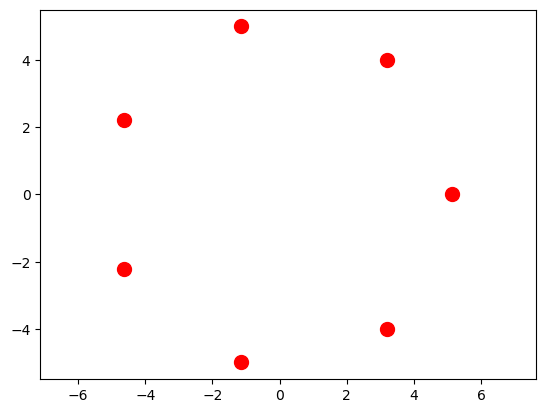

In [40]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.axis('equal');

In [41]:
side0=vertices[0] + r*np.transpose([np.cos(angle + np.pi),np.sin(angle + np.pi)])

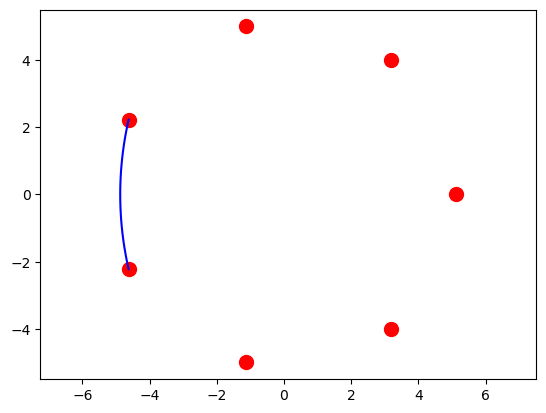

In [42]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.axis('equal');

In [43]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),
 np.sin(angle + np.pi + alpha)])

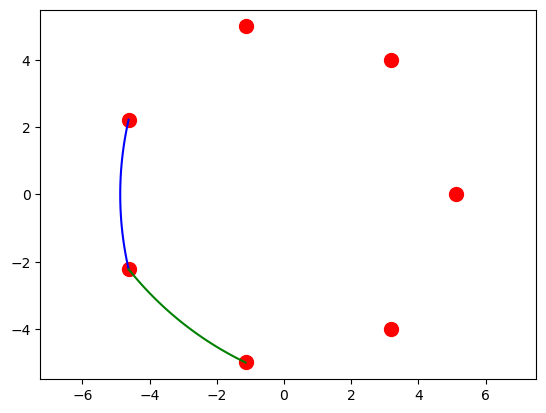

In [44]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b-',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g-',markersize=20)
plt.axis('equal');

In [45]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [46]:
sides=np.concatenate(list_sides)

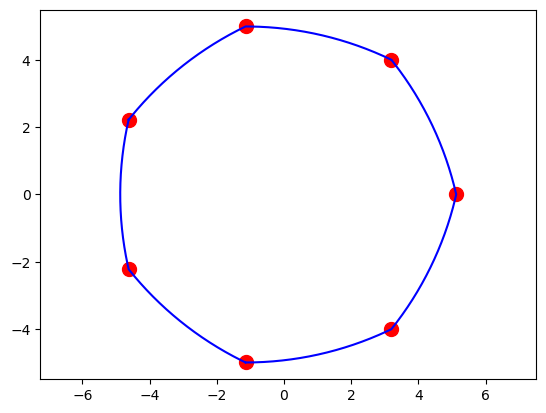

In [47]:
plt.plot(vertices[:,0],vertices[:,1],'r.',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b-',markersize=20)
plt.axis('equal');

## Задание 4.3. Результирующая пользовательская функция

In [48]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    
    assert isinstance(n, int) and n > 2 and n % 2 == 1, "n должно быть нечётным целым числом больше 2"
    assert isinstance(center, np.ndarray) and center.shape == (2,), "center должен быть массивом из 2 элементов"
    assert isinstance(r, (int, float)) and r > 0, "r должно быть положительным числом"
    assert isinstance(N, int) and N > 0, "N должно быть натуральным числом"
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l = 2*r*np.sin(np.pi/(2*n))
    R = l/(2*np.sin(np.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    sides = np.concatenate([vertices[i] +
     r*np.transpose([np.cos(angle + np.pi + i*alpha),
     np.sin(angle + np.pi + i*alpha)])
     for i in range(n)])
    return sides

## Задание 4.4. Тестирование функции

In [49]:
import relo
import numpy as np
import matplotlib.pyplot as plt

In [50]:
relo.regular_polygon_Relo(n=2)

AssertionError: n должно быть нечётным целым числом больше 2

In [51]:
relo.regular_polygon_Relo(r=-1)

AssertionError: r должно быть положительным числом

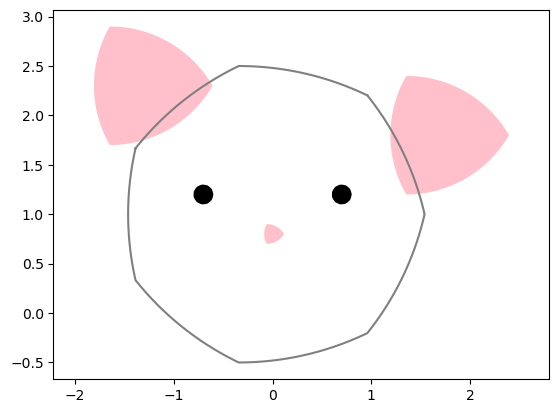

In [52]:
plt.figure()
ax=plt.axes()
sides1 = relo.regular_polygon_Relo(7, np.array([0, 1]), 3, 100)
ax.plot(sides1[:, 0], sides1[:, 1],'gray',markersize=20)
sides2 = relo.regular_polygon_Relo(3,np.array([0,0.8]),0.2,100)
ax.fill(sides2[:, 0], sides2[:, 1],'pink')
sides3 = relo.regular_polygon_Relo(n=3, center=np.array([-1.3, 2.3]), r=1.2, N=70)
ax.fill(sides3[:, 0], sides3[:, 1],'pink')
sides4 = relo.regular_polygon_Relo(3, np.array([1.7, 1.8]), N=100, r=1.2)
ax.fill(sides4[:, 0], sides4[:, 1],'pink')
sides5 = relo.regular_polygon_Relo(11, np.array([-0.7, 1.2]), N=100, r=0.2)
ax.fill(sides5[:, 0], sides5[:, 1],'black')
sides6 = relo.regular_polygon_Relo(11, np.array([0.7, 1.2]), N=100, r=0.2)
ax.fill(sides6[:, 0], sides6[:, 1],'black')
plt.axis('equal');